Skipping file Nov-18-2024v2labels_pose_30Hz0566_1DLC_Resnet50_20_videos_0603Oct10shuffle1_snapshot_200.csv due to missing columns
Skipping file Nov-18-2024v2labels_pose_30Hz0566_2DLC_Resnet50_20_videos_0603Oct10shuffle1_snapshot_200.csv due to missing columns
Skipping file Nov-18-2024v2labels_pose_30Hz0566_3DLC_Resnet50_20_videos_0603Oct10shuffle1_snapshot_200.csv due to missing columns
Skipping file Nov-18-2024v2labels_pose_30Hz0567_1DLC_Resnet50_20_videos_0603Oct10shuffle1_snapshot_200.csv due to missing columns
Skipping file Nov-18-2024v2labels_pose_30Hz0567_2DLC_Resnet50_20_videos_0603Oct10shuffle1_snapshot_200.csv due to missing columns
Skipping file Nov-18-2024v2labels_pose_30Hz0567_3DLC_Resnet50_20_videos_0603Oct10shuffle1_snapshot_200.csv due to missing columns
Skipping file Nov-18-2024v2labels_pose_30Hz0568_1DLC_Resnet50_20_videos_0603Oct10shuffle1_snapshot_200.csv due to missing columns
Skipping file Nov-18-2024v2labels_pose_30Hz0568_2DLC_Resnet50_20_videos_0603Oct10shuffle1_

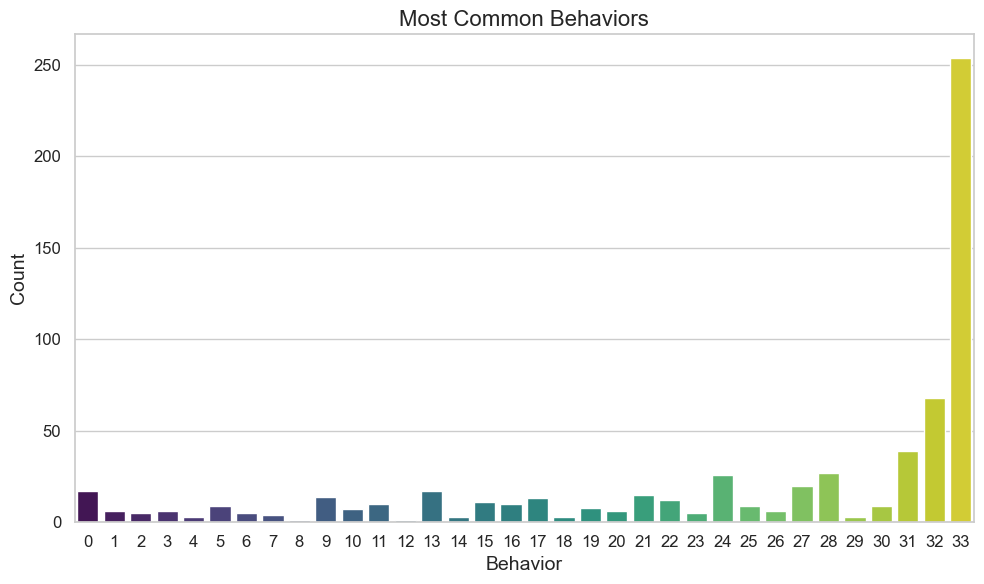

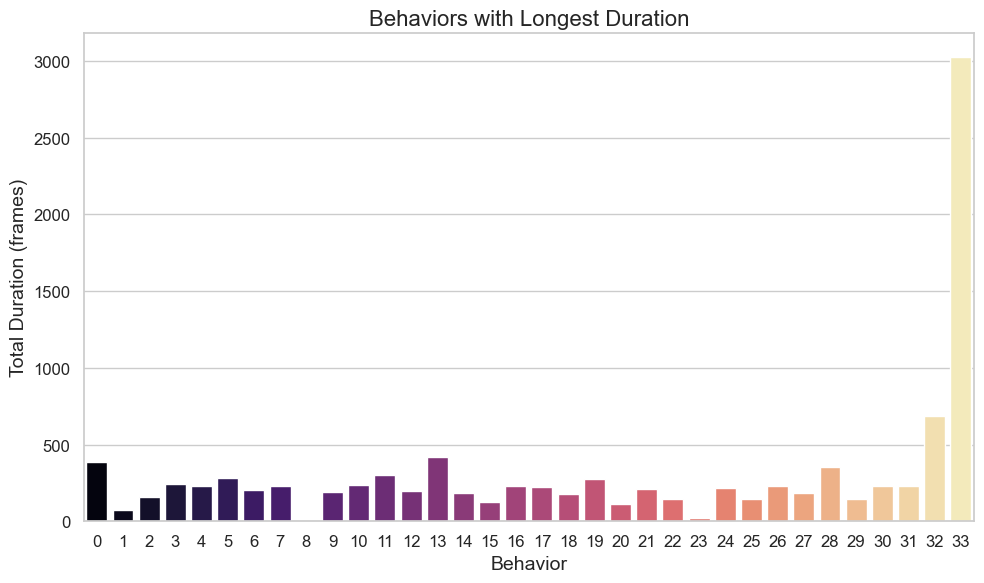

In [ ]:
# Imports
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Directory
directory_path = r"C:\Users\username\filepath\Bsoid\control\BSOID"

# Initialize Dictionaries for Counts and Durations
behavior_counts = {}
behavior_durations = {}

# Tally Data from Multiple CSVs
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):

        # Read File
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path)
        
        # Drop 'Unnamed: 0' Column
        if 'Unnamed: 0' in df.columns:
            df = df.drop(columns=['Unnamed: 0'])
        
        # Ensure Required Columns Exist
        if 'B-SOiD labels' not in df.columns or 'Run lengths' not in df.columns:
            print(f"Skipping file {filename} due to missing columns")
            continue
        
        # Aggregate
        for _, row in df.iterrows():
            label = row['B-SOiD labels']
            duration = row['Run lengths']
            behavior_counts[label] = behavior_counts.get(label, 0) + 1
            behavior_durations[label] = behavior_durations.get(label, 0) + duration

# Convert Data to DataFrame
summary_df = pd.DataFrame({
    'Behavior': list(behavior_counts.keys()),
    'Count': list(behavior_counts.values()),
    'Total Duration': [behavior_durations[b] for b in behavior_counts.keys()]
})

# Sort Results for Visualization
most_common_behaviors = summary_df.sort_values(by='Count', ascending=False)
longest_duration_behaviors = summary_df.sort_values(by='Total Duration', ascending=False)

# Plot
sns.set(style="whitegrid")

# Plot 1: Most Common Behaviors
plt.figure(figsize=(10, 6))
sns.barplot(x='Behavior', y='Count', data=most_common_behaviors, palette="viridis")
plt.title('Most Common Behaviors', fontsize=16)
plt.xlabel('Behavior', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Plot 2: Longest Duration Behaviors
plt.figure(figsize=(10, 6))
sns.barplot(x='Behavior', y='Total Duration', data=longest_duration_behaviors, palette="magma")
plt.title('Behaviors with Longest Duration', fontsize=16)
plt.xlabel('Behavior', fontsize=14)
plt.ylabel('Total Duration (frames)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Source: ChatGPT